Kotlyarov Nicolay, 308 group

In [352]:
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.stats
from math import log
from scipy.stats import uniform
from scipy.stats import cauchy

Task_1: Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [353]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

In [354]:
random = [rng() for i in range(1000)]
Numbers = np.arange(0,10)
NumbersSort = np.arange(0,10)
arr = np.zeros(10)
arr_1 = np.zeros(10)
massiv_vesov = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
massiv_vesov = massiv_vesov/massiv_vesov.sum() 

In [355]:
print(massiv_vesov)

[0.05973121 0.14932802 0.08312593 0.11946242 0.15430562 0.26879044
 0.05525137 0.0099552  0.00049776 0.09955202]


In [356]:
massiv_vesov.sum()

1.0

In [357]:
NumbersSort = massiv_vesov.argsort()[::-1]
massiv_vesovSort = np.sort(massiv_vesov)[::-1]
print(massiv_vesovSort)
print(NumbersSort)

[0.26879044 0.15430562 0.14932802 0.11946242 0.09955202 0.08312593
 0.05973121 0.05525137 0.0099552  0.00049776]
[5 4 1 3 9 2 0 6 7 8]


In [358]:
for i in range (1, 10):
    massiv_vesov[i] = massiv_vesov[i] + massiv_vesov[i-1]

for i in range (1, 10):
    massiv_vesovSort[i] = massiv_vesovSort[i] + massiv_vesovSort[i-1]

In [359]:
#неупорядоченные веса:
#P(x=X_k) = P(x<=X_K) - P(x<=X_k-1)
tic = time.time()
for i in range(1000):
    for j in range (10):
        if ((j == 0 and random[i] < massiv_vesov[j]) or (j !=0 and random[i] < massiv_vesov[j] and random[i] >= massiv_vesov[j-1])):
            arr[j] = arr[j] + 1
            break

toc = time.time()
print(toc - tic) 
print(arr)

0.00797724723815918
[ 49. 163.  75. 119. 154. 271.  59.  10.   2.  98.]


In [360]:
#упорядоченные веса:
#P(x=X_k) = P(x<=X_K) - P(x<=X_k-1)
tic = time.time()
for i in range(1000):
    for j in range (10):
        if ((j == 0 and random[i] < massiv_vesovSort[j]) or (j !=0 and random[i] < massiv_vesovSort[j] and random[i] >= massiv_vesovSort[j-1])):
            arr_1[j] = arr_1[j] + 1
            break

toc = time.time()
print(toc - tic) 
print(arr_1)
    

0.0039882659912109375
[268. 152. 145. 106. 105.  90.  68.  56.  10.   0.]


Видно, что алгоритм с упорядоченными весами по убыванию работает быстрее.

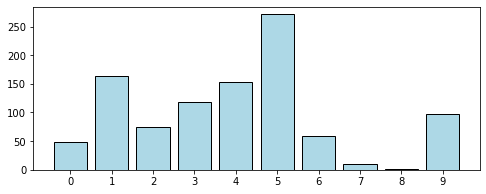

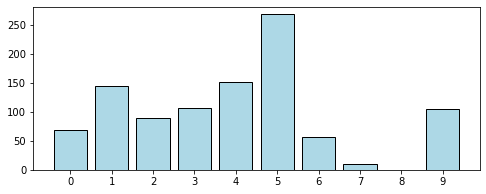

In [361]:
plt.figure(figsize = (8, 3))
plt.bar(Numbers, arr, color='lightblue', edgecolor = 'black')
plt.xticks(Numbers)
plt.show()

plt.figure(figsize = (8, 3))
plt.bar(NumbersSort, arr_1, color='lightblue', edgecolor = 'black')
plt.xticks(NumbersSort)
plt.show()

Task_2: Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

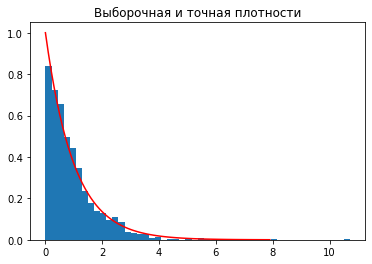

In [362]:
def Ln_P(x, y):
    return -log(1-x)/y

random = [rng() for i in range(1000)]
random = [inv(random[i], 1) for i in range(1000)]
plt.title("Выборочная и точная плотности")
plt.hist(random, density=True, bins = 50)
r = np.arange(0, 8, .1)
plt.plot(r, scipy.stats.expon.pdf(r, scale=1),color = 'red')
plt.show()

Task_3: Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

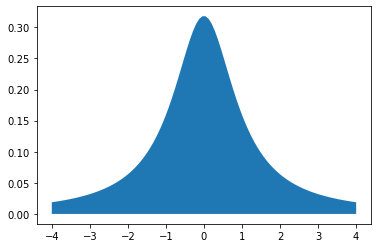

In [363]:
from scipy import stats
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

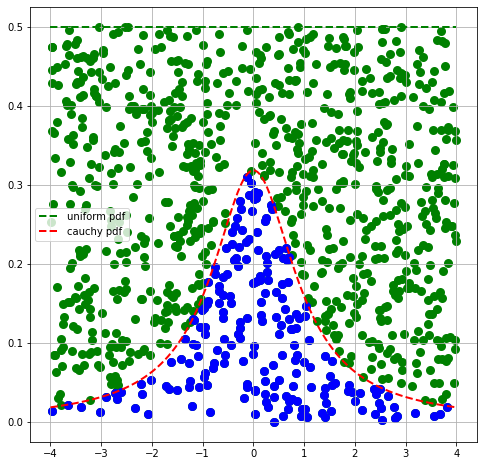

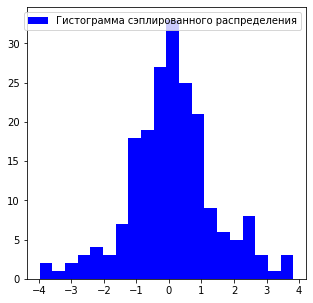

In [364]:
import random
plt.figure(figsize = (8, 8))
x = np.linspace(-4, 4, 1000)
Ravnom = uniform(-4, 8)

X_sample = np.array([random.uniform(-4, 4) for i in range (1000)])
Y_sample = np.array([random.uniform(0, 0.5) for i in range (1000)])

plt.plot(x, 4*Ravnom.pdf(x),'r--', lw=2, label='uniform pdf', color = 'green')
plt.plot(x, cauchy.pdf(x), 'r--', lw=2, label='cauchy pdf')
plt.scatter(X_sample, Y_sample, color = 'green', lw = 3)
plt.legend()
grid1 = plt.grid(True)
Cauchy = np.where(Y_sample <= cauchy.pdf(X_sample))

plt.scatter(X_sample[Cauchy], Y_sample[Cauchy], color = 'blue', lw =3)

plt.figure(figsize = (5, 5))
plt.hist(X_sample[Cauchy], bins = 20, color = 'blue', label = 'Гистограмма сэплированного распределения')
plt.legend()
plt.show()

Task_4: Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

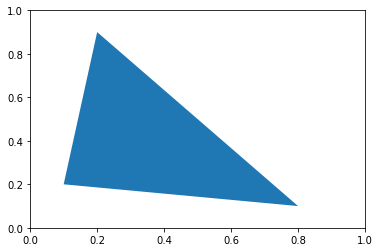

In [365]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

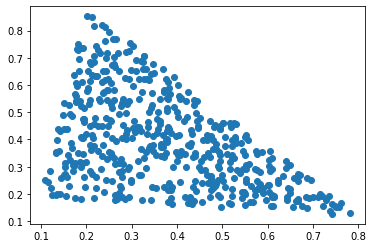

In [366]:
x = np.array([rng() for i in range(500)])
y = np.array([rng() for i in range(500)])
x[(x + y) > 1] = 1 - x[(x + y) > 1]
y[(x + y) > 1] = 1 - y[(x + y) > 1] #получили прямоугольный теугольник из квадрата, теперь его нужно деформировать

x =  0.7 * x + 0.1 * y + 0.1
y = -0.1 * x + 0.7 * y + 0.2

plt.scatter(x, y)
plt.show()

Task_5: Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

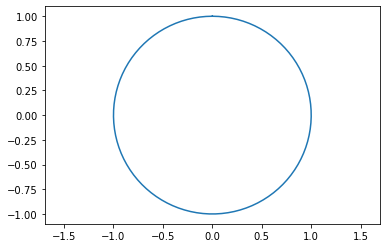

In [367]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

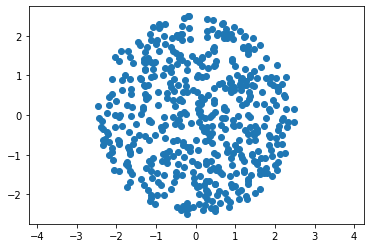

In [368]:
PI = np.pi
A = np.array([rng()*2*PI for i in range(500)])
R = [rng()*2*np.pi for i in range(500)]
#делаем Якобиант постоянным (x = sqrt(радиус)cos(угол) и y = sqrt(радиус)sin(угол))
plt.scatter(np.sqrt(R) * np.cos(A), np.sqrt(R) * np.sin(A))
plt.axis('equal')
plt.show()

Task_6: Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

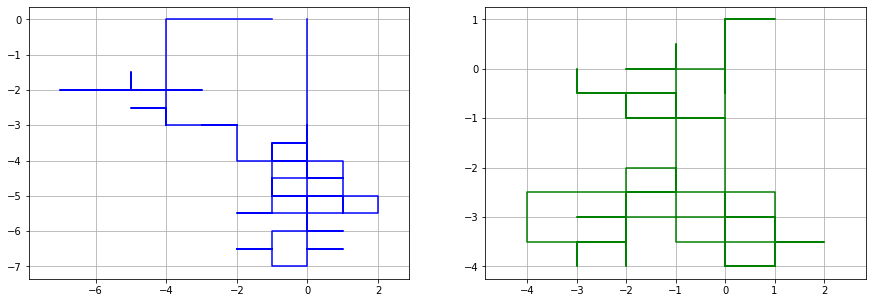

In [369]:
def Random_walk():
    x = np.array([(rng()-0.5)*2 for i in range(500)]) 
    y = np.where(x > 0)
    y = y[0][0:50]
    z = np.where(x < 0)
    z = z[0][0:50]

    A = np.zeros(120)
    A[y] += 1

    B = np.zeros(120)
    B[z] += 1
    #срезаем до последнего нуля всё
    W_ = A[(A != 0) | (B != 0)]
    Q_ = B[(A != 0) | (B != 0)]

    return np.cumsum(W_ - Q_)

#Осталось повернуть на 90 градусов так как мы рассматривали шаги 1 и -1 как движение вверх или вниз
x_1 = Random_walk()
x_2 = Random_walk()
y_1 = Random_walk()
y_2 = Random_walk()
x_1 = (x_1 + x_2) / 2 
x_2 = (x_1 - x_2) / 2
y_1 = (y_1 + y_2) / 2 
y_2 = (y_1 - y_2) / 2
fig, sub = plt.subplots(1, 2, figsize=(15, 5))
sub[0].plot(x_1, x_2, color = 'blue')
sub[1].plot(y_1, y_2, color = 'green')
sub[0].axis('equal')
sub[1].axis('equal')
grid = sub[0].grid(True)
grid = sub[1].grid(True)
plt.show()

Task_7: Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

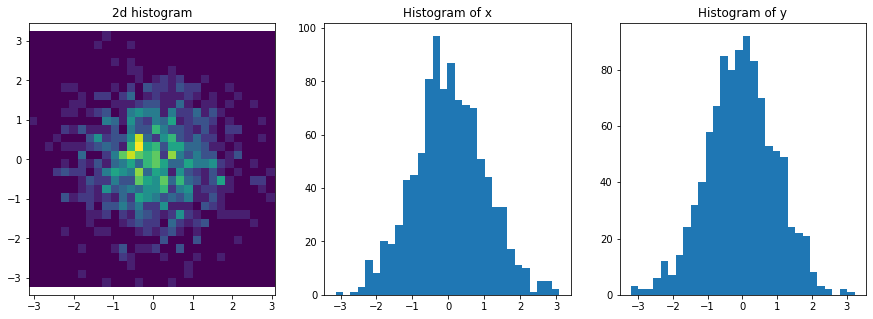

In [449]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

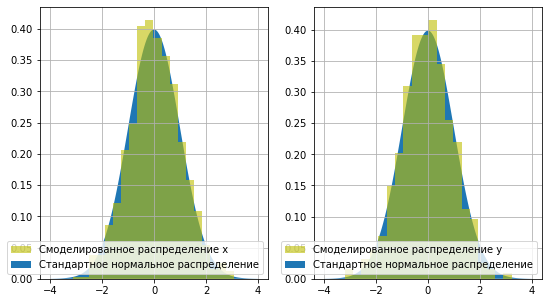

In [450]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
ax[0].hist(x, bins = 20, density=True, alpha = 0.6, color = 'y', label = 'Смоделированное распределение х')
ax[1].hist(y, bins = 20, density=True, alpha = 0.6, color = 'y', label = 'Смоделированное распределение у')
dist = stats.norm()
grid0 = ax[0].grid(True)
L = np.linspace(-4, 4, 1000)
ax[0].fill_between(L, 0, dist.pdf(L), label = 'Стандартное нормальное распределение')
grid1 = ax[1].grid(True)
ax[1].fill_between(L, 0, dist.pdf(L), label = 'Стандартное нормальное распределение')
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
plt.show()

Теперь можно сделать вывод, что алгоритм (Box-Muller algorithm) и правда формирует выборку из независимых N(0,1) случаных величин.

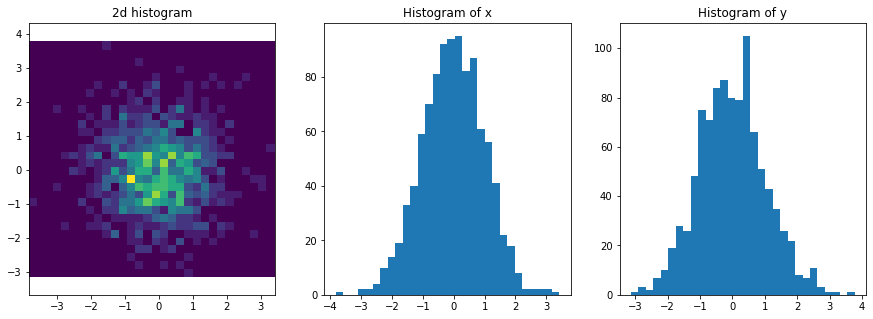

In [451]:
i = 0
cos = np.array([])
sin = np.array([])
while i<1000:
    u, v = 2*np.random.rand(2,1)-1
    s = u**2+v**2
    if 0<s<=1:
        cos = np.append(cos, u)
        sin = np.append(sin, v)
        i+=1

s = cos**2+sin**2
r = np.sqrt(-2 * np.log(s)/s)
x = cos * r
y = sin * r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Нужно получить из случайного вектора, компоненты которого независимые гауссовские величины с параметрами (0, 1) гауссовский вектор с мат ожиданием (3, 6) и матрицей ковариаций ((2, 1), (1, 4)), для этого воспольлуемся теоремой, что при линейной замене, матрица ковариаций преобразуется как АТA.T, а матожидание как A*M . То есть, нам нужно решить матричное уравение: A**A.T= Cov  (можно решить руками или методом Халецкого)

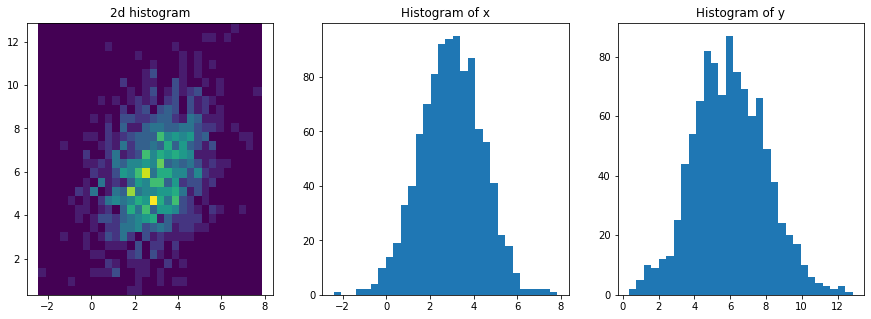

In [452]:
X = np.sqrt(2) * x + 3
Y = 1 / np.sqrt(2) * x + np.sqrt(7 / 2) * y + 6


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(X, Y, bins=30)
ax[0].axis('equal')
ax[1].hist(X, bins=30)
ax[2].hist(Y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Task_8: Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [527]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
np.linalg.det(B)

0.0

Заметим, что последняя стока, выражается как (первая + пятая)*(-1). Поэтому применим метод Халецкого для подматрицы 8 на 8, а преобразования для последнего элемента, буду выражаться такие как для последней строки.

In [528]:
C = B[:8, :8]
np.linalg.det(C)

10125.000000000007

In [532]:
L = np.linalg.cholesky(C)

In [533]:
#выражаем посленюю строчку
Last = (L[0:1] + L[4:5])*(-1)
print(Last)

[[-0.70710678 -0.         -0.         -0.         -1.22474487 -0.
  -0.         -0.        ]]


Чтобы проверить, что данный вектор действительно обладает исходной ковариационной матрицей, переменожим АLA.T

In [534]:
rezult = np.concatenate((L, Last), axis=0)
row = np.zeros((9,1))
rezult1 = np.concatenate((rezult, row), axis=1)
E = np.eye(9)
np.dot(np.dot(rezult1,E),rezult1.T)

array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
       [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

Task_9: С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [665]:
import random
def Pi(iterations):
    x = 0
    for i in range(iterations):
        x+=(1-random.random()**2)**.5
    return (4*x/iterations)

In [666]:
PI = np.pi
PI

3.141592653589793

Оценим число π с точностью до 3 знаков после запятой с вероятностью 99%:  
Воспользуемся Центральной предельной теоремой:  
$$P(|\frac{1}{N}\sum_ix_i-M[X]|\le\frac{z\sqrt{D[X]}}{\sqrt{N}}=\pi-3.141\approx0.0005)\rightarrow2Ф(z)-1\ge0.99$$  
Отсюда находим, что $$z\ge2.58$$ и подставляем в Центральную теорему и находим N  
$$N\ge\frac{2.58^2(\frac{\pi}{4}(1-\frac{\pi}{4})}{0.0005^2}$$  
Получаем, что $$N\ge4487689$$



In [669]:
for i in range(1,6):
    print(Pi(4487689))

3.1411363165671813
3.141481433465305
3.141725076983515
3.141640849282062
3.141366103964911


Видно, что получанная оценка на N дает приближенное значение числа 𝜋 до 3 знака после запятой.

Task_10: Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [726]:
def Generation(n):
    Bell = 0
    for k in range(1,101):
        Bell+=(k)**n/np.math.factorial(k)
    Bell*=1/np.exp(1)
    Prob = np.array([(k)**n/(b*np.math.factorial(k)*np.exp(1)) for k in range(100)])
    Mass1 = np.cumsum(Prob)
    V = np.random.rand()
    SUM = 0
    while 1:
        if V < Mass1[SUM]:
            V = SUM+1
            break;
        else:
            SUM+=1
    Prob = np.array([1/V for i in range(V)])
    Mass1 = np.cumsum(Prob)
    Mass2 = np.array([rng() for i in range(n)])
    list1 = []
    for i in range(n):
        SUM=0
        while SUM!=-1:
            if Mass1[SUM]>Mass2[i]:
                list1.append(SUM)
                SUM=-1
            else:
                SUM+=1
    return list1

E = 0
for i in range(1000):
    E+=len(np.unique(Generation(100)))
rez = E/1000
print(rez)

29.413
